## U.S. Wildfire Exploratory Data Analysis (EDA) - Is There a Greater Issue at Hand? ##

The objective of conducting EDA is to examine the relationships between variables in the data and to uncover additional relevant trends in the data.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
file = 'Federal Firefighting Costs (Suppression Only).csv'
data = pd.read_csv(file)
df = pd.DataFrame(data)
df.head()

,Year,Fires,Acres,ForestService,DOIAgencies,Total
0,1985,"82,591","2,896,147","$161,505,000","$78,438,000","$239,943,000"
1,1986,"85,907","2,719,162","$111,625,000","$91,153,000","$202,778,000"
2,1987,"71,300","2,447,296","$253,657,000","$81,452,000","$335,109,000"
3,1988,"72,750","5,009,290","$429,609,000","$149,317,000","$578,926,000"
4,1989,"48,949","1,827,310","$331,672,000","$168,115,000","$499,787,000"


## Cleanup ##

In [3]:
df['ForestService'] = df['ForestService'].str.strip('$')
df['DOIAgencies'] = df['DOIAgencies'].str.strip('$')
df['Total'] = df['Total'].str.strip('$')
df['Currency'] = 'USD'
df['Country'] = 'United States'
df = df.rename(columns = {'Total':'Total Fire Suppression Cost', 'Acres':'Acres Burnt'})
df['Fires'] = df['Fires'].str.replace(",", "", regex=True)
df['Acres Burnt'] = df['Acres Burnt'].str.replace(",", "", regex=True)
df['Total Fire Suppression Cost'] = df['Total Fire Suppression Cost'].str.replace(",", "", regex=True)
df['Fires'] = df['Fires'].astype(int)
df['Acres Burnt'] = df['Acres Burnt'].astype(int)
df['Total Fire Suppression Cost'] = df['Total Fire Suppression Cost'].astype(int)
df.head()

,Year,Fires,Acres Burnt,ForestService,DOIAgencies,Total Fire Suppression Cost,Currency,Country
0,1985,82591,2896147,"161,505,000","78,438,000",239943000,USD,United States
1,1986,85907,2719162,"111,625,000","91,153,000",202778000,USD,United States
2,1987,71300,2447296,"253,657,000","81,452,000",335109000,USD,United States
3,1988,72750,5009290,"429,609,000","149,317,000",578926000,USD,United States
4,1989,48949,1827310,"331,672,000","168,115,000",499787000,USD,United States


$ Convert $ $ Necessary $ $ Fields $ $ to $ $ Same $ $ Unit $ $ (Millions) $

In [4]:
# Convert Fires which is in thousands to millions
df['Fires'] = round((df['Fires'] / 1000000), 4)

# Convert Total Fire Suppression Cost which contains millions and billions to millions
df['Total Fire Suppression Cost'] = round((df['Total Fire Suppression Cost'] * 1000), 4)

## Create Additional Fields for EDA ##

In [5]:
df['Acres Burnt per Fire'] = round(df['Acres Burnt']/df['Fires'], 2)
df['Suppression Cost per Fire'] = df['Total Fire Suppression Cost']/df['Fires']
df['Year over Year Change in Fire Suppression Cost'] = df['Total Fire Suppression Cost'].diff(1)
df['Year over Year Change in Fire Suppression Cost'].fillna(value='0', inplace=True)
df['Year over Year Change in Fire Suppression Cost'] = df['Year over Year Change in Fire Suppression Cost'].astype(int)
df = df[['Country', 'Year', 'Fires', 'Acres Burnt', 'Total Fire Suppression Cost', 'Acres Burnt per Fire', 'Suppression Cost per Fire', 'Year over Year Change in Fire Suppression Cost', 'Currency']]
df.head()

,Country,Year,Fires,Acres Burnt,Total Fire Suppression Cost,Acres Burnt per Fire,Suppression Cost per Fire,Year over Year Change in Fire Suppression Cost,Currency
0,United States,1985,0.0826,2896147,239943000000,35062312.35,2.904879e+12,0,USD
1,United States,1986,0.0859,2719162,202778000000,31654970.90,2.360629e+12,-37165000000,USD
2,United States,1987,0.0713,2447296,335109000000,34323927.07,4.699986e+12,132331000000,USD
3,United States,1988,0.0728,5009290,578926000000,68808928.57,7.952280e+12,243817000000,USD
4,United States,1989,0.0489,1827310,499787000000,37368302.66,1.022059e+13,-79139000000,USD


In [6]:
df.corr()

,Year,Fires,Acres Burnt,Total Fire Suppression Cost,Acres Burnt per Fire,Suppression Cost per Fire,Year over Year Change in Fire Suppression Cost
Year,1.000000,-0.351482,0.642506,0.857381,0.741606,0.857940,0.029446
Fires,-0.351482,1.000000,0.036839,-0.273095,-0.279531,-0.478377,0.330647
Acres Burnt,0.642506,0.036839,1.000000,0.748912,0.938592,0.636569,0.497200
Total Fire Suppression Cost,0.857381,-0.273095,0.748912,1.000000,0.815224,0.962434,0.346860
Acres Burnt per Fire,0.741606,-0.279531,0.938592,0.815224,1.000000,0.787706,0.360177
Suppression Cost per Fire,0.857940,-0.478377,0.636569,0.962434,0.787706,1.000000,0.199336
Year over Year Change in Fire Suppression Cost,0.029446,0.330647,0.497200,0.346860,0.360177,0.199336,1.000000


## Visualize Relationships Between Variables ##

Text(0.5, 1.0, 'Feature Correlation')

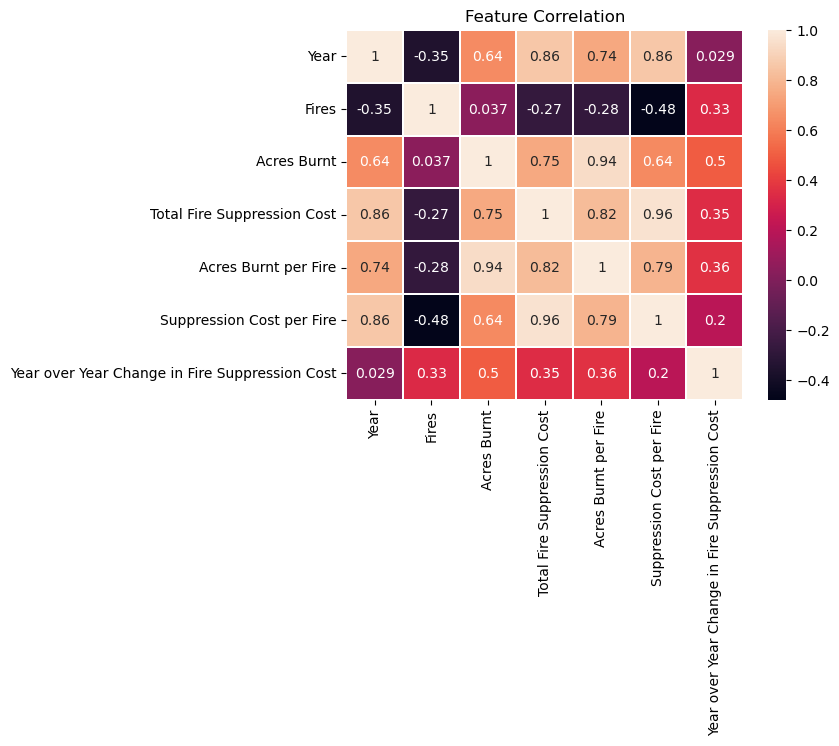

In [7]:
sns.heatmap(df.corr(), annot=True, linewidths=.05)
plt.title('Feature Correlation', fontsize=12)

**To no surprise, there is a relatively strong positive relationship between fields like "Suppression Cost per Fire" and "Acres Burnt" (correlation of 0.64) and there is a strong positive relationship between fields like "Total Fire Suppression Cost" and "Suppression Cost per Fire" (correlation of 0.96). Let's analyze these correlations and fields over time. Inversely, there are low positive correlations and low negative correlations for the feature "Fires." The feature "Year over Year Change in Fire Suppression Cost" also has low positive correlations, so it may be excluded.**

## Understanding Overlying Trends in Data ##

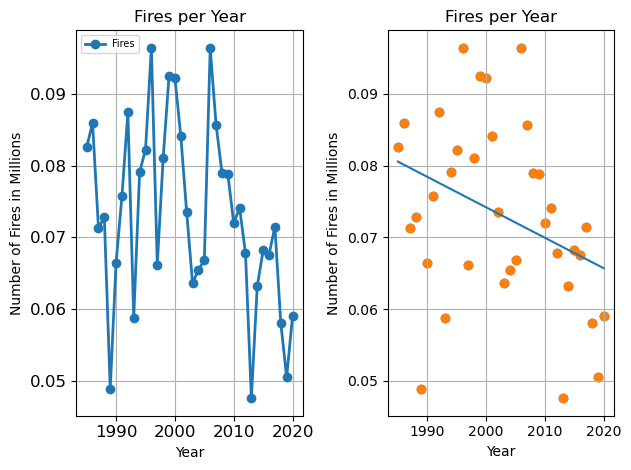

In [8]:
df = df.set_index(df['Year'])

plt.subplot(1, 2, 1)
df['Fires'].plot(linewidth=2, fontsize=12, marker='o')
plt.title('Fires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires in Millions')
plt.grid()
plt.legend(fontsize=7, loc='upper left')
plt.tight_layout()

plt.subplot(1, 2, 2)
x = df['Year']
y = df['Fires']
plt.scatter(x, y)
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.scatter(x, y)
plt.plot(x, line(x))
plt.title('Fires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires in Millions')
plt.grid()
plt.tight_layout()

Outliers are distinguished at years 1989, 1996, 2006, 2012, and 2019 and there is a good bit of variability in the grouping.

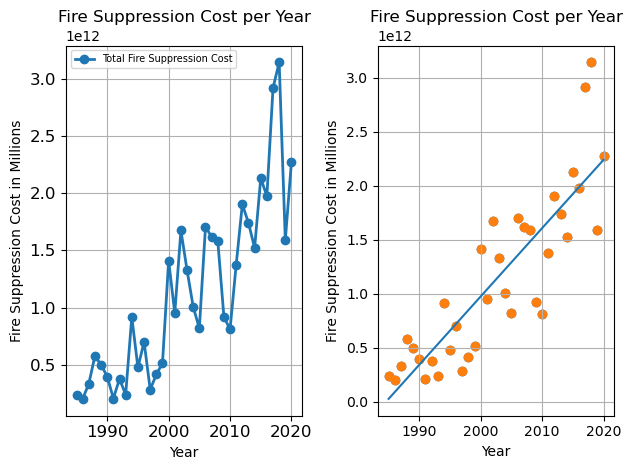

In [9]:
plt.subplot(1, 2, 1)
df['Total Fire Suppression Cost'].plot(linewidth=2, fontsize=12, marker='o')
plt.title('Fire Suppression Cost per Year')
plt.xlabel('Year')
plt.ylabel('Fire Suppression Cost in Millions')
plt.grid()
plt.legend(fontsize=7, loc='upper left')
plt.tight_layout()

plt.subplot(1, 2, 2)
x = df['Year']
y = df['Total Fire Suppression Cost']
plt.scatter(x, y)
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.scatter(x, y)
plt.plot(x, line(x))
plt.title('Fire Suppression Cost per Year')
plt.xlabel('Year')
plt.ylabel('Fire Suppression Cost in Millions')
plt.grid()
plt.tight_layout()

Outliers are distinguished at years 2017 and 2018 but the grouping is tight.

**Takeaways: The charts show that while the number of fires per year has declined, the cost of putting fires out has increased per year which is an interesting disposition. Does this infer that fires are more potent where they burn more acres? Or possibly they have grown more costly over time (i.e. think inflation, cost changes to services and goods)? Let's find out!**

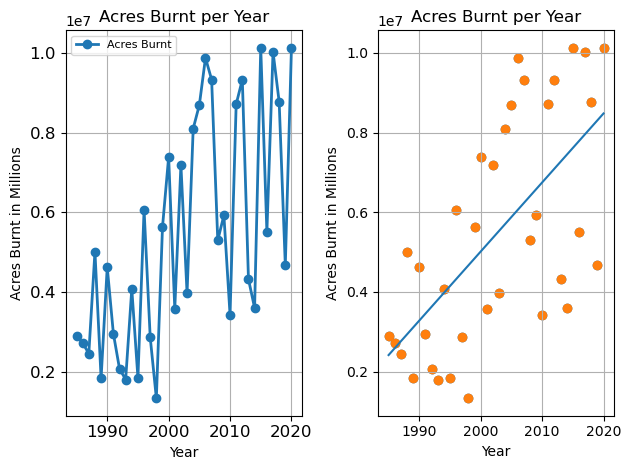

In [10]:
plt.subplot(1, 2, 1)
df['Acres Burnt'].plot(linewidth=2, fontsize=12, marker='o')
plt.title('Acres Burnt per Year')
plt.xlabel('Year')
plt.ylabel('Acres Burnt in Millions')
plt.grid()
plt.legend(fontsize=8, loc='upper left')
plt.tight_layout()

plt.subplot(1, 2, 2)
x = df['Year']
y = df['Acres Burnt']
plt.scatter(x, y)
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.scatter(x, y)
plt.plot(x, line(x))
plt.title('Acres Burnt per Year')
plt.xlabel('Year')
plt.ylabel('Acres Burnt in Millions')
plt.grid()
plt.tight_layout()

Outliers are not overly distinguished as there is a good bit of variability in the grouping.

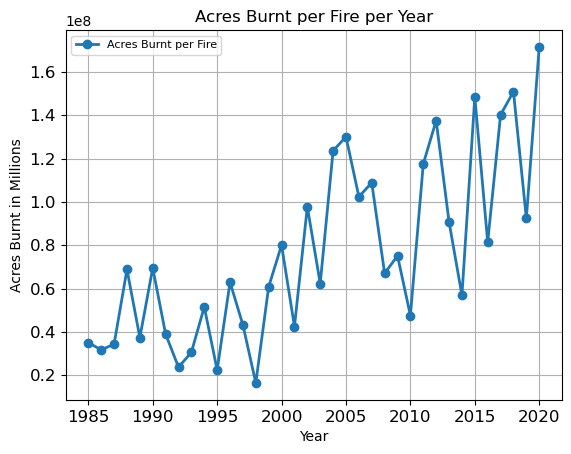

In [11]:
df['Acres Burnt per Fire'].plot(linewidth=2, fontsize=12, marker='o')
plt.title('Acres Burnt per Fire per Year')
plt.xlabel('Year')
plt.ylabel('Acres Burnt in Millions')
plt.grid()
plt.legend(fontsize=8, loc='upper left')

**Over time, not only have fires burnt more acres per year, they also burn more acres per fire. This is a key finding and it is crucial for the clents of this project to understand going forward. Further, we do not have the data to validate changes in cost over time but understanding that component of this also would be valuable to the clients. It is worth seeing if there is a trend in the year over year change in fire suppression cost. Perhaps that can provide a degree of clarity on changes in cost over time?**

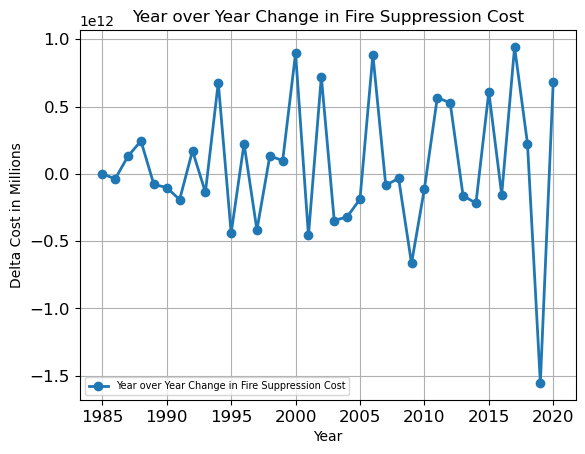

In [12]:
df['Year over Year Change in Fire Suppression Cost'].plot(linewidth=2, fontsize=12, marker='o')
plt.title('Year over Year Change in Fire Suppression Cost')
plt.xlabel('Year')
plt.ylabel('Delta Cost in Millions')
plt.grid()
plt.legend(fontsize=7, loc='lower left')

**This graph does not provide clarity to changes in costs over time. While costs have fluctuated over time with greater troughs and peaks seen, cost activity has maintained relatively consistent except for 2019, which was a signifcant outlier.**